In [49]:
import numpy as np
import pandas as pd 
import alpha_vantage 
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt 
import seaborn as sns 
import time

#Retrieving data from yfinance 

tickers = ["GOOGL", "NVDA"]
api_key = "91ZEX88XROMWFNQO"
ts = TimeSeries(key=api_key, output_format="pandas")
prices = {}
start_date = "2025-01-01"
end_date = "2025-10-01"
for ticker in tickers:
    data,_ = ts.get_daily(symbol=ticker,outputsize="full")
    prices[ticker] = data
    time.sleep(15)
prices_data = pd.concat(prices, axis=1, keys=tickers)
prices_data = prices_data.loc[start_date:end_date]

In [2]:
import numpy as np
import pandas as pd 
import alpha_vantage 
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt 
import seaborn as sns 
import time

In [50]:
prices_data.head()

GOOGL                                            NVDA           \
           1. open   2. high   3. low 4. close   5. volume 1. open  2. high   
date                                                                          
2025-01-02  190.65  192.0000  187.500   189.43  20370828.0  136.00  138.880   
2025-01-03  191.37  193.2100  189.975   191.79  18596159.0  140.01  144.900   
2025-01-06  193.98  198.2222  193.850   196.87  29563638.0  148.59  152.156   
2025-01-07  197.11  201.0000  194.600   195.49  26487244.0  153.03  153.130   
2025-01-08  192.57  196.2900  192.380   193.95  24864766.0  142.58  143.950   

                                            
              3. low 4. close    5. volume  
date                                        
2025-01-02  134.6300   138.31  198247166.0  
2025-01-03  139.7300   144.47  229322478.0  
2025-01-06  147.8201   149.43  265377359.0  
2025-01-07  140.0100   140.14  351782174.0  
2025-01-08  137.5600   140.11  227349948.0

In [51]:
google = prices_data["GOOGL"]
nvidia = prices_data["NVDA"]

google.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-01-02,190.65,192.0000,187.500,189.43,20370828.0
2025-01-03,191.37,193.2100,189.975,191.79,18596159.0
2025-01-06,193.98,198.2222,193.850,196.87,29563638.0
2025-01-07,197.11,201.0000,194.600,195.49,26487244.0
2025-01-08,192.57,196.2900,192.380,193.95,24864766.0


In [52]:
google.rename(columns={"1. open" : "Open",
                       "2. high": "High",
                       "3. low": "Low",
                       "4. close": "Close",
                       "5. volume":"Volume"}, inplace=True) #Renaming all the columns
nvidia.rename(columns={"1. open" : "Open",
                       "2. high": "High",
                       "3. low": "Low",
                       "4. close": "Close",
                       "5. volume":"Volume"}, inplace=True)
google.columns, nvidia.columns

/var/folders/t8/zlgx07xx3m14kxtv1vv3m6lw0000gn/T/ipykernel_4836/363237786.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t8/zlgx07xx3m14kxtv1vv3m6lw0000gn/T/ipykernel_4836/363237786.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object'),
 Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object'))

In [6]:
#Saving data to csv files

google.to_csv("google_close_25.csv")
nvidia.to_csv("nvidia_close_25.csv")

In [19]:
google = pd.read_csv("google_close_25.csv", sep=";")
nvidia = pd.read_csv("nvidia_close_25.csv", sep=";")

In [24]:
google["date"] = pd.to_datetime(google["date"])
nvidia["date"] = pd.to_datetime(nvidia["date"])

/var/folders/t8/zlgx07xx3m14kxtv1vv3m6lw0000gn/T/ipykernel_4836/425274759.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  google["date"] = pd.to_datetime(google["date"])
/var/folders/t8/zlgx07xx3m14kxtv1vv3m6lw0000gn/T/ipykernel_4836/425274759.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nvidia["date"] = pd.to_datetime(nvidia["date"])


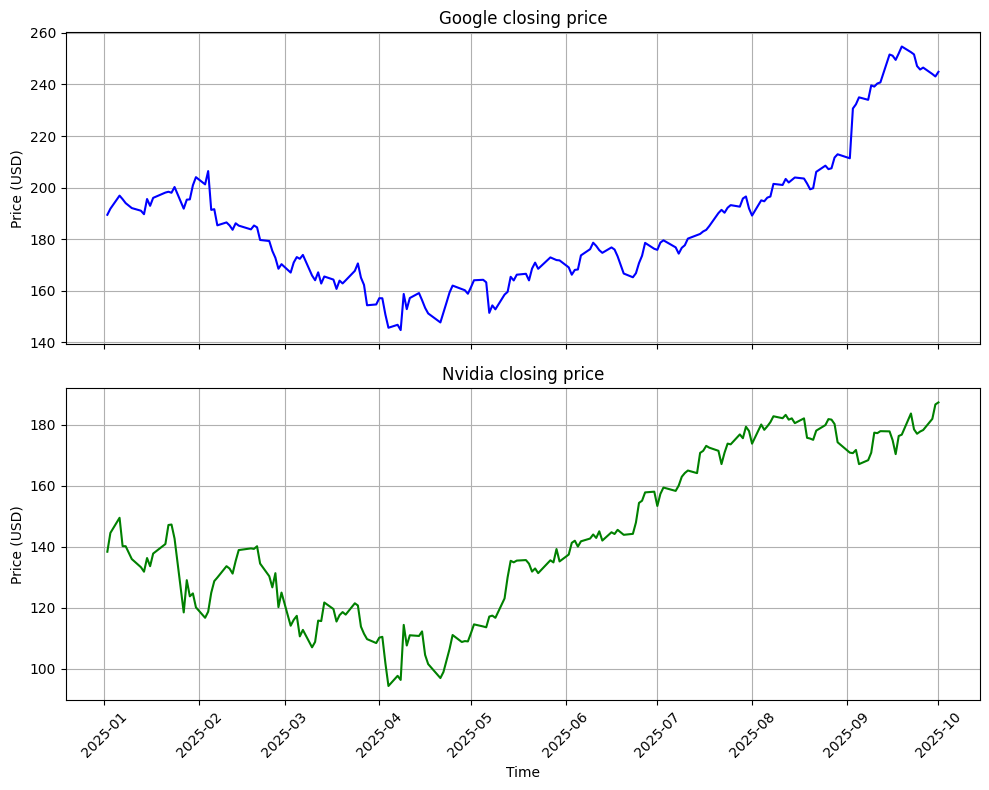

In [53]:
#Let's visualize Google and Nvidia prices with a lineplot:

fig,axes = plt.subplots(nrows=2, ncols=1, figsize=(10,8), sharex=True)

#Google
sns.lineplot(ax=axes[0], data=google, x=google.index, y="Close", color="blue")
axes[0].set_title("Google closing price")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Price (USD)")
axes[0].grid(True)
axes[0].tick_params(axis = "x", rotation=45)

#Nvidia
sns.lineplot(ax=axes[1], data=nvidia, x=nvidia.index, y="Close", color="green")
axes[1].set_title("Nvidia closing price")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Price (USD)")
axes[1].grid(True)
axes[1].tick_params(axis="x", rotation=45)

#Show
plt.tight_layout()
plt.show()





In [54]:
#Let's see basic numpy and scipy operations:

google_close = google["Close"].values
nvidia_close = nvidia["Close"].values

print(f"Google mean closing price in 2025 is: {np.mean(google_close)}")
print(f"Nvidia mean closing price in 2025 is: {np.mean(nvidia_close)}")
print(f"Google median closing price in 2025 is: {np.median(google_close)}")
print(f"Nvidia median closing price in 2025 is: {np.median(nvidia_close)}")
print(f"Google closing price sd in 2025 is: {np.std(google_close)}")
print(f"Nvidia closing price sd in 2025 is: {np.std(nvidia_close)}")


Google mean closing price in 2025 is: 185.4587165775401
Nvidia mean closing price in 2025 is: 143.04791443850266
Google median closing price in 2025 is: 179.25
Nvidia median closing price in 2025 is: 139.4
Google closing price sd in 2025 is: 26.25414088978819
Nvidia closing price sd in 2025 is: 26.316464426828084


In [55]:
#Stats from Scipy:

from scipy import stats

google_desc = stats.describe(google_close, nan_policy="omit")
nvidia_desc = stats.describe(nvidia_close, nan_policy="omit")
print(f"Google stats are: {google_desc}")
print(f"Nvidia stats are: {nvidia_desc}")

Google stats are: DescribeResult(nobs=187, minmax=(np.float64(144.7), np.float64(254.72)), mean=np.float64(185.4587165775401), variance=np.float64(692.9857198493473), skewness=np.float64(1.008313830926535), kurtosis=np.float64(0.47478799894392854))
Nvidia stats are: DescribeResult(nobs=187, minmax=(np.float64(94.31), np.float64(187.24)), mean=np.float64(143.04791443850266), variance=np.float64(696.2797208958656), skewness=np.float64(0.09952088520426722), kurtosis=np.float64(-1.2971952080495406))


In [56]:
google_returns = np.diff(google_close) / google_close[:-1]
nvidia_returns = np.diff(nvidia_close) / nvidia_close[:-1] #Simple returns

In [57]:
#Cumulative returns:

google_cum_returns = np.cumprod(1 + google_close) - 1
nvidia_cum_returns = np.cumprod(1 + nvidia_close) - 1

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:57: RuntimeWarning:

overflow encountered in accumulate



In [58]:
#Relative performance:

relative = google_close / nvidia_close

In [59]:
#Correlation and covariance:

corr = np.corrcoef(google_close, nvidia_close)
cov = np.cov(google_close, nvidia_close)

In [31]:
#SMA
window = 10
google_sma = np.convolve(google_close, np.ones(window) / window, mode="valid")
nvidia_sma = np.convolve(nvidia_close, np.ones(window) / window, mode="valid")

In [60]:
#Log-returns:

google_log = np.log(google_close[1:] / google_close[:-1])
nvidia_log = np.log(nvidia_close[1:] / nvidia_close[:-1])

In [61]:
#Max drawdown:

cum_max_google = np.maximum.accumulate(google_close)
drawdown_google = (google_close - cum_max_google / cum_max_google)
max_drawdown_google = np.min(drawdown_google)

cum_max_nvidia = np.maximum.accumulate(nvidia_close)
drawdown_nvidia = (nvidia_close - cum_max_nvidia / cum_max_nvidia)
max_drawdown_nvidia = np.min(drawdown_nvidia)

In [62]:
print(f"Correlations between Google and NVIDIA is: {corr[0,1]}") 
print(f"Max drawdown for Google is {max_drawdown_google}, while for Nvidia is {max_drawdown_nvidia}")

Correlations between Google and NVIDIA is: 0.7626129698453938
Max drawdown for Google is 143.7, while for Nvidia is 93.31


In [63]:
ema_10_google = google["Close"].ewm(adjust=False, span = 10).mean()
ema_10_nvidia = nvidia["Close"].ewm(adjust=False, span = 10).mean()

/var/folders/t8/zlgx07xx3m14kxtv1vv3m6lw0000gn/T/ipykernel_4836/1456688227.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t8/zlgx07xx3m14kxtv1vv3m6lw0000gn/T/ipykernel_4836/1456688227.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t8/zlgx07xx3m14kxtv1vv3m6lw0000gn/T/ipykernel_4836/1456688227.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

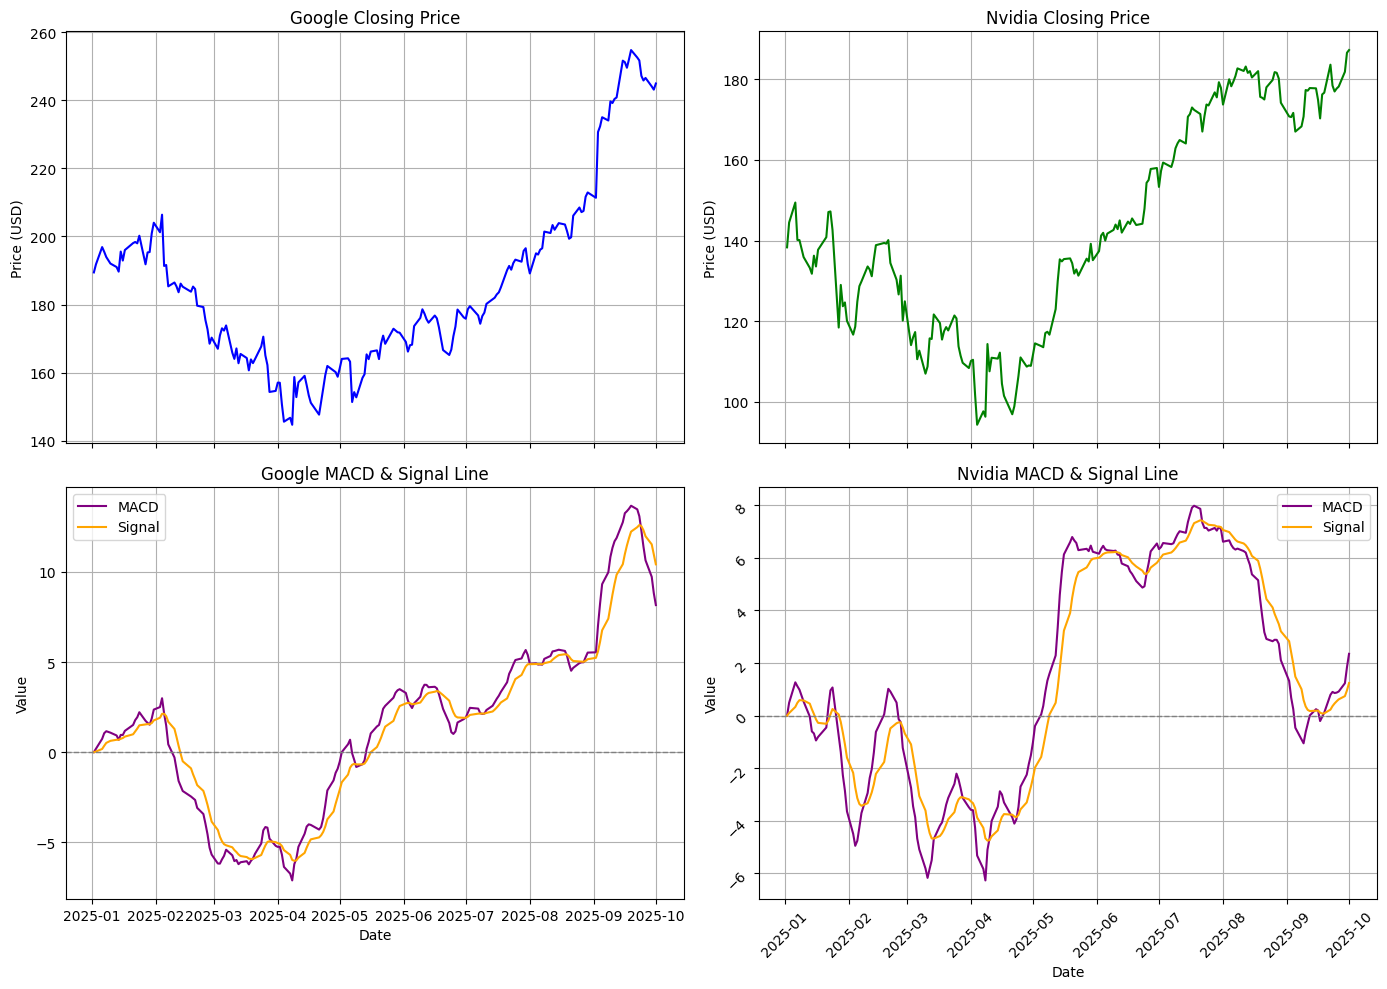

In [64]:
#Now I want to plot the MACD line against the signal line,
#to see bullish and bearish days 

google["EMA_12"] = google["Close"].ewm(adjust=False, span=12).mean()
google["EMA_26"] = google["Close"].ewm(adjust=False, span=26).mean() #Computing for Google
google["MACD"] = google["EMA_12"] - google["EMA_26"]
google["Signal"] = google["MACD"].ewm(adjust=False, span=9).mean()

nvidia["EMA_12"] = nvidia["Close"].ewm(adjust=False, span=12).mean()
nvidia["EMA_26"] = nvidia["Close"].ewm(adjust=False, span=26).mean() #Computing for Nvidia
nvidia["MACD"] = nvidia["EMA_12"] - nvidia["EMA_26"]
nvidia["Signal"] = nvidia["MACD"].ewm(adjust=False, span=9).mean()

#Standard setup
fig,axes = plt.subplots(2,2, figsize=(14,10), sharex=True)

#Google setup
sns.lineplot(ax=axes[0,0], data=google, x=google.index, y="Close", color="blue")
axes[0,0].set_title("Google Closing Price")
axes[0,0].set_ylabel("Price (USD)")
axes[0,0].grid(True)

sns.lineplot(ax=axes[1,0], data=google, x=google.index, y="MACD", label="MACD", color="purple")
sns.lineplot(ax=axes[1,0], data=google, x=google.index, y="Signal", label="Signal", color="orange")
axes[1,0].axhline(0, color='gray', linestyle='--', linewidth=1)
axes[1,0].set_title("Google MACD & Signal Line")
axes[1,0].set_xlabel("Date")
axes[1,0].set_ylabel("Value")
axes[1,0].grid(True)
axes[1,0].legend()

#Nvidia setup
sns.lineplot(ax=axes[0,1], data=nvidia, x=nvidia.index, y="Close", color="green")
axes[0,1].set_title("Nvidia Closing Price")
axes[0,1].set_ylabel("Price (USD)")
axes[0,1].grid(True)

sns.lineplot(ax=axes[1,1], data=nvidia, x=nvidia.index, y="MACD", label="MACD", color="purple")
sns.lineplot(ax=axes[1,1], data=nvidia, x=nvidia.index, y="Signal", label="Signal", color="orange")
axes[1,1].axhline(0, color='gray', linestyle='--', linewidth=1)
axes[1,1].set_title("Nvidia MACD & Signal Line")
axes[1,1].set_xlabel("Date")
axes[1,1].set_ylabel("Value")
axes[1,1].tick_params(rotation=45)
axes[1,1].grid(True)
axes[1,1].legend()

#Show
plt.tight_layout()
plt.show()





In [66]:
#Now let's compute the percentage of bullish vs bearish days for the securities:

bullish_days_google = google[google["MACD"] > google["Signal"]]
bullish_days_nvidia = nvidia[nvidia["MACD"] > nvidia["Signal"]]
bearish_days_google = google[google["MACD"] < google["Signal"]]
bearish_days_nvidia = nvidia[nvidia["MACD"] < nvidia["Signal"]]

bullish_pct_google = len(bullish_days_google) / len(google) * 100
bearish_pct_google = len(bearish_days_google) / len(google) * 100

bullish_pct_nvidia = len(bullish_days_nvidia) / len(nvidia) * 100
bearish_pct_nvidia = len(bearish_days_nvidia) / len(nvidia) * 100

print(f"Percentage of bullish days for NVIDIA: {round(bullish_pct_nvidia,2)} %")
print(f"Percentage of bullish days for Google: {round(bullish_pct_google,2)} %")


Percentage of bullish days for NVIDIA: 51.34 %
Percentage of bullish days for Google: 63.64 %


In [67]:
#Let's do the same but with as signal line, the 9 days SMA

window_1 = 10

google["SMA_fast"] = google["Close"].rolling(window=window_1).mean()
nvidia["SMA_fast"] = nvidia["Close"].rolling(window=window_1).mean()

window_2 = 30

google["SMA_slow"] = google["Close"].rolling(window=window_2).mean()
nvidia["SMA_slow"] = nvidia["Close"].rolling(window=window_2).mean()


bullish_days_google_sma = google[google["SMA_fast"] > google["SMA_slow"]]
bullish_days_nvidia_sma = nvidia[nvidia["SMA_fast"] > nvidia["SMA_slow"]]
bearish_days_google_sma = google[google["SMA_fast"] < google["SMA_slow"]]
bearish_days_nvidia_sma = nvidia[nvidia["SMA_fast"] < nvidia["SMA_slow"]]

bullish_pct_google_sma = len(bullish_days_google_sma) / len(google) * 100
bearish_pct_google_sma = len(bearish_days_google_sma) / len(google) * 100

bullish_pct_nvidia_sma = len(bullish_days_nvidia_sma) / len(nvidia) * 100
bearish_pct_nvidia_sma = len(bearish_days_nvidia_sma) / len(nvidia) * 100

print(f"Percentage of bullish days for NVIDIA: {round(bullish_pct_nvidia_sma,2)} %")
print(f"Percentage of bullish days for Google: {round(bullish_pct_google_sma,2)} %")


Percentage of bullish days for NVIDIA: 51.87 %
Percentage of bullish days for Google: 56.15 %


In [68]:
#Now let's compute the RSI:

def compute_RSI(data:pd.Series, period:int):
    returns = data.pct_change().fillna(0)
    up = returns.clip(lower=0)
    down = -returns.clip(upper=0)
    mean_up = up.ewm(adjust=False, span=period).mean()
    mean_down = down.ewm(adjust=False, span=period).mean()
    RS = mean_up / mean_down
    RSI = 100 - (100 / (1 + RS))
    return RSI

google["RSI_14"] = compute_RSI(google["Close"], period=14)
nvidia["RSI_14"] = compute_RSI(nvidia["Close"], period=14)

    

In [69]:
print(f"Google maximum RSI for 2025 is: {np.max(google["RSI_14"])}")
print(f"Nvidia maximum RSI for 2025 is: {np.max(nvidia["RSI_14"])}")

Google maximum RSI for 2025 is: 100.0
Nvidia maximum RSI for 2025 is: 100.0


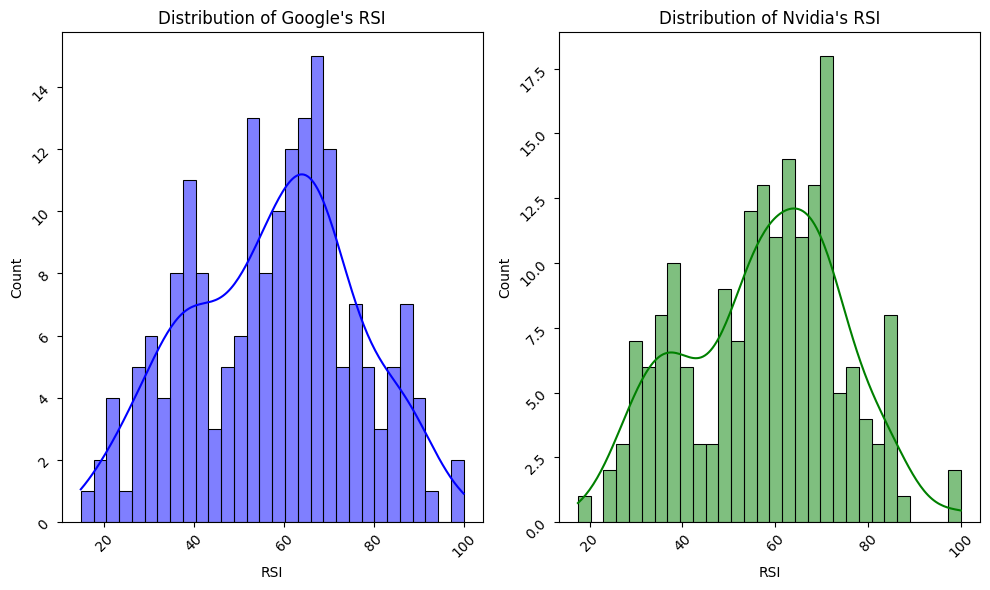

In [70]:
#Now let's see the distributions of RSI for the two securities:

fig,axes = plt.subplots(1,2, figsize=(10,6))

sns.histplot(data=google, bins=30, ax=axes[0], x="RSI_14", kde=True, color="blue")
axes[0].set_title("Distribution of Google's RSI")
axes[0].set_xlabel("RSI")
axes[0].tick_params(rotation=45)

sns.histplot(data=nvidia, bins=30, ax=axes[1], x="RSI_14", kde=True, color="green")
axes[1].set_title("Distribution of Nvidia's RSI")
axes[1].set_xlabel("RSI")
axes[1].tick_params(rotation=45)

plt.tight_layout()
plt.show()

In [71]:
RSI_stats_google = stats.describe(google["RSI_14"], nan_policy="omit")
RSI_stats_nvidia = stats.describe(nvidia["RSI_14"], nan_policy="omit")
print(f"Google RSI stats are: {RSI_stats_google}")
print(f"Nvidia RSI stats are: {RSI_stats_nvidia}")

Google RSI stats are: DescribeResult(nobs=np.int64(186), minmax=(masked_array(data=14.78453041,
             mask=False,
       fill_value=1e+20), masked_array(data=100.,
             mask=False,
       fill_value=1e+20)), mean=np.float64(57.67193119423287), variance=np.float64(343.0837227234159), skewness=masked_array(data=-0.09611308,
             mask=False,
       fill_value=1e+20), kurtosis=np.float64(-0.6291692537465083))
Nvidia RSI stats are: DescribeResult(nobs=np.int64(186), minmax=(masked_array(data=17.50075199,
             mask=False,
       fill_value=1e+20), masked_array(data=100.,
             mask=False,
       fill_value=1e+20)), mean=np.float64(57.59528430246667), variance=np.float64(273.8890672599454), skewness=masked_array(data=-0.15270881,
             mask=False,
       fill_value=1e+20), kurtosis=np.float64(-0.5433993652199058))


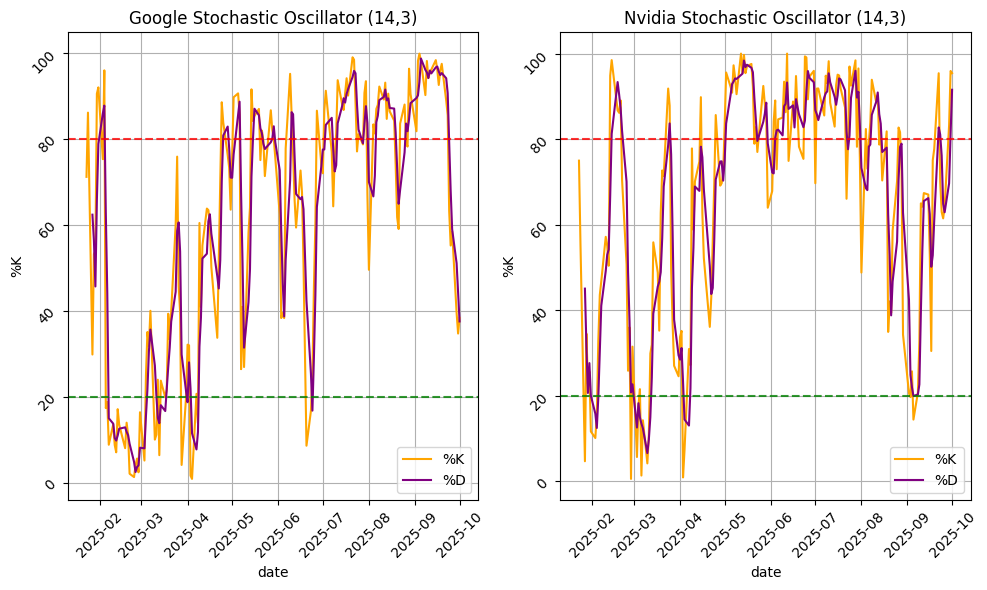

In [80]:
#Let's see, now, the stochastic oscillator:

# Stochastic Oscillator per Google e Nvidia
period = 14

# Google
google["Low_14"] = google["Low"].rolling(window=period).min()
google["High_14"] = google["High"].rolling(window=period).max()
google["%K"] = ((google["Close"] - google["Low_14"]) / (google["High_14"] - google["Low_14"])) * 100
google["%D"] = google["%K"].rolling(window=3).mean()

# Nvidia
nvidia["Low_14"] = nvidia["Low"].rolling(window=period).min()
nvidia["High_14"] = nvidia["High"].rolling(window=period).max()
nvidia["%K"] = ((nvidia["Close"] - nvidia["Low_14"]) / (nvidia["High_14"] - nvidia["Low_14"])) * 100
nvidia["%D"] = nvidia["%K"].rolling(window=3).mean()


#Plotting with lineplot:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Google
sns.lineplot(data=google, x=google.index, y="%K", ax=axes[0], color="orange", label="%K")
sns.lineplot(data=google, x=google.index, y="%D", ax=axes[0], color="purple", label="%D")
axes[0].axhline(80, color="red", linestyle="--", alpha=0.8)
axes[0].axhline(20, color="green", linestyle="--", alpha=0.8)
axes[0].set_title("Google Stochastic Oscillator (14,3)")
axes[0].tick_params(rotation=45)
axes[0].legend()
axes[0].grid(True)

# Nvidia
sns.lineplot(data=nvidia, x=nvidia.index, y="%K", ax=axes[1], color="orange", label="%K")
sns.lineplot(data=nvidia, x=nvidia.index, y="%D", ax=axes[1], color="purple", label="%D")
axes[1].axhline(80, color="red", linestyle="--", alpha=0.8)
axes[1].axhline(20, color="green", linestyle="--", alpha=0.8)
axes[1].set_title("Nvidia Stochastic Oscillator (14,3)")
axes[1].tick_params(rotation=45)
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()




In [81]:
#Now let's construct the Bollinger Bands:

def bollinger_bands(data:pd.DataFrame, series:pd.Series, k:int|float, period:int):
    upper_band = series.rolling(window=period).mean() + series.rolling(window=period).std(ddof=1) * k 
    lower_band = series.rolling(window=period).mean() - series.rolling(window=period).std(ddof=1) * k
    middle_band = series.rolling(window=period).mean()
    return upper_band,lower_band,middle_band

google["upper_band"],google["lower_band"],google["middle_band"] = bollinger_bands(
    data=google,
    series=google["Close"],
    k=2,
    period=14
)

nvidia["upper_band"],nvidia["lower_band"],nvidia["middle_band"] = bollinger_bands(
    data=nvidia,
    series=nvidia["Close"],
    k=2,
    period=14
)



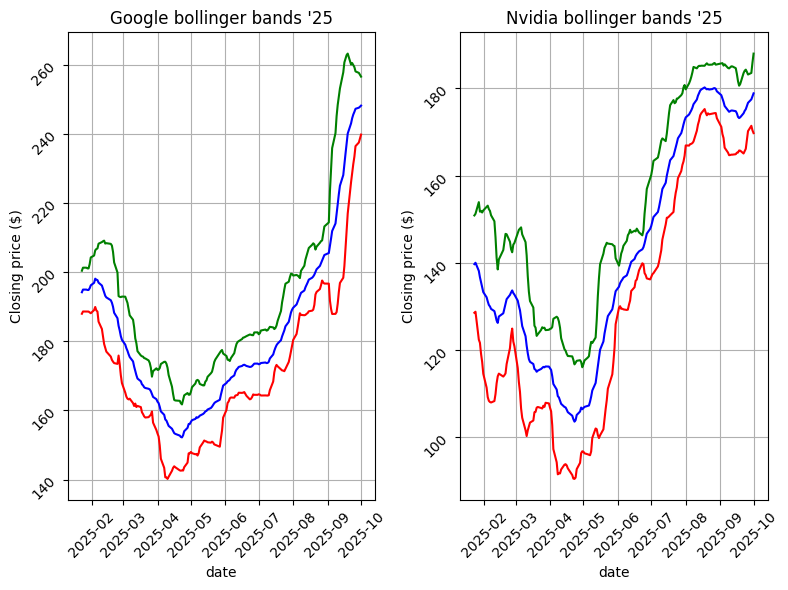

In [82]:
#Now let's plot them:

fig,axes = plt.subplots(1,2, figsize=(8,6))

sns.lineplot(data=google, ax=axes[0], x=google.index, y="middle_band", color="blue")
sns.lineplot(data=google, ax=axes[0], x=google.index, y="upper_band", color="green")
sns.lineplot(data=google, ax=axes[0], x=google.index, y="lower_band", color="red")
axes[0].set_title("Google bollinger bands '25")
axes[0].set_ylabel("Closing price ($)")
axes[0].tick_params(rotation=45)
axes[0].grid(True)

sns.lineplot(data=nvidia, ax=axes[1], x=nvidia.index, y="middle_band", color="blue")
sns.lineplot(data=nvidia, ax=axes[1], x=nvidia.index, y="upper_band", color="green")
sns.lineplot(data=nvidia, ax=axes[1], x=nvidia.index, y="lower_band", color="red")
axes[1].set_title("Nvidia bollinger bands '25")
axes[1].set_ylabel("Closing price ($)")
axes[1].tick_params(rotation=45)
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [74]:
#Let's install mplfinance and visualize a candlestick chart

import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=google.index,
                                     open=google["Open"],
                                     close=google["Close"],
                                     high=google["High"],
                                     low=google["Low"],
                                     increasing_line_color="green",
                                     decreasing_line_color="red")
                                     ]) #Google

fig.update_layout(
    title="Candlestick Google '25",
    xaxis_title="Date",
    yaxis_title="Price ($)",
    xaxis_rangeslider_visible=False
)

fig.show()


In [75]:
fig_nvidia = go.Figure(data=[go.Candlestick(x=nvidia.index,
                                     open=nvidia["Open"],
                                     close=nvidia["Close"],
                                     high=nvidia["High"],
                                     low=nvidia["Low"],
                                     increasing_line_color="green",
                                     decreasing_line_color="red")
                                     ]) #Nvidia

fig_nvidia.update_layout(
    title="Candlestick Nvidia '25",
    xaxis_title="Date",
    yaxis_title="Price ($)",
    xaxis_rangeslider_visible=False
)

fig_nvidia.show()
